# Generate particles at defined locations

Sometime it is useful to generate images where the particle locations are not randomly generated but set by the user:

In [1]:
import synpivimage as spi 
spi.__version__

from pprint import pprint

In [2]:
import os
import numpy as np

dataset_dir = 'example_data_dir_definedloc'

In [3]:
cfg = spi.config.SynPivConfig(
    ny=25,
    nx=25,
    bit_depth=8,
    dark_noise=0,
    image_particle_peak_count=200,
    laser_shape_factor=2,
    laser_width=2,
    noise_baseline=0,
    particle_number=10,
    particle_position_file='mypositions.txt',
    particle_size_illumination_dependency=True,
    particle_size_mean=2.5,
    particle_size_std=1.0,
    qe=1.,
    sensitivity=1.,
    shot_noise=True,
    square_image=True)
cfg

SynPivConfig(ny=25, nx=25, square_image=True, bit_depth=8, noise_baseline=0.0, dark_noise=0.0, shot_noise=True, sensitivity=1.0, qe=1.0, particle_number=10, particle_size_mean=2.5, particle_size_std=1.0, laser_width=2, laser_shape_factor=2, image_particle_peak_count=200, particle_position_file='mypositions.txt', particle_size_illumination_dependency=True)

In [4]:
CFGs = spi.ConfigManager([cfg], )
CFGs

<ConfigManager (1 configurations)>

In [5]:
hdf_filename = CFGs.to_hdf(dataset_dir, nproc=1, overwrite=True)

Writing 1 dataset into 1 HDF5 file(s). This may take a while...


100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.37cfg dict/s]

Processing standard names...
... done.


In [6]:
import h5rdmtoolbox as h5tbx
h5tbx.__version__

import matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, '')

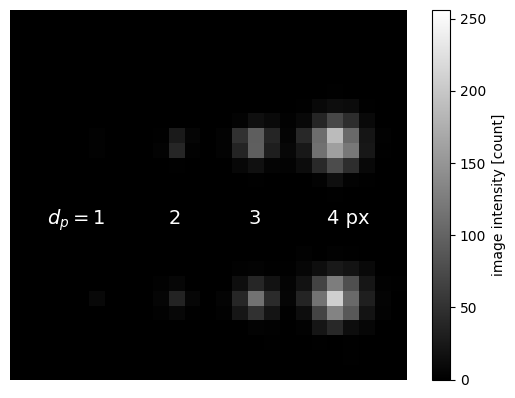

In [7]:
# with h5tbx.File(hdf_filename[0]) as h5:
    # pprint(h5.distinct('standard_name'))
    # h5.find_one({'standard_name': 'synthetic_particle_image'})[:].plot(cmap='gray',norm=matplotlib.colors.LogNorm(), vmin=1, vmax=2**8)
plt.figure()
h5tbx.database.FileDB(hdf_filename[0]).find_one({'standard_name': 'synthetic_particle_image'})[:].plot(cmap='gray', vmax=2**8)
plt.text(1.8,10,'$d_p=1$', color='white', size=14)
plt.text(9.5,10,'2', color='white', size=14)
plt.text(14.5,10,'3', color='white', size=14)
plt.text(19.5,10,'4 px', color='white', size=14)
plt.axis('off')
plt.title('')

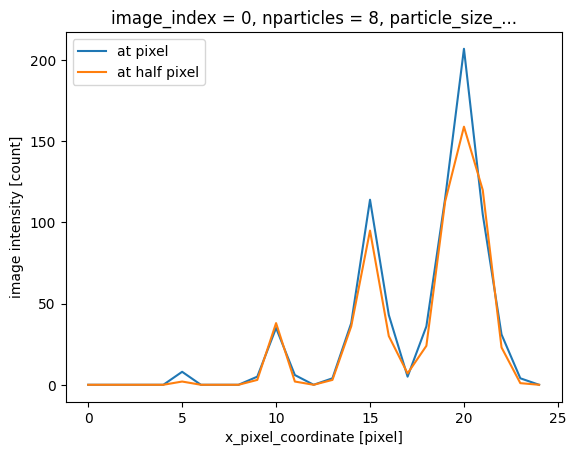

In [8]:
# with h5tbx.H5File(hdf_filename[0]) as h5:
h5tbx.database.FileDB(hdf_filename[0]).find_one({'standard_name': 'synthetic_particle_image'})[0,5,:].plot(label='at pixel')
h5tbx.database.FileDB(hdf_filename[0]).find_one({'standard_name': 'synthetic_particle_image'})[0,15,:].plot(label='at half pixel')
plt.legend()